In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
trj=md.load('step5_prod2.xtc',top='step5_1.gro')

In [26]:
oxygen=trj.top.select('name O')
oxygenrmsd=md.rmsd(trj,trj,atom_indices=oxygen)
sodium=trj.top.select('name SOD')
sodiumrmsd=md.rmsd(trj,trj,atom_indices=sodium)
chloride=trj.top.select('name CLA')
chloridermsd=md.rmsd(trj,trj,atom_indices=chloride)

901


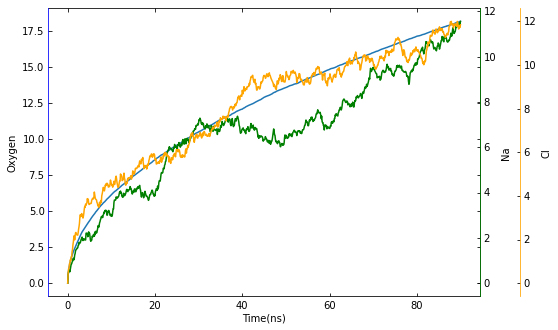

In [61]:
time=np.zeros((901,1))
for i in range (901):
    time[i]=i*0.1
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.set_ylabel('Oxygen')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Na')
ax3.set_ylabel("Cl")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(40,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,oxygenrmsd)
curve2,=ax2.plot(time,sodiumrmsd,color='green')
curve3,=ax3.plot(time,chloridermsd,color='orange')
ax1.axis['left'].line.set_color('blue')
ax2.axis['right2'].line.set_color('green')
ax3.axis['right3'].line.set_color('orange')